<a href="https://colab.research.google.com/github/sri-sudha14/PyTorch/blob/main/MathNumPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transpose**

In [ ]:
import numpy as np
import torch

# Using Numpy

In [ ]:
nv = np.array([[1, 2, 3]])
print("Matrix:", nv)
nvT = nv.T
print("Transpose:\n", nvT)

Matrix: [[1 2 3]]
Transpose:
 [[1]
 [2]
 [3]]


# Using PyTorch

In [ ]:
nm = torch.tensor([[1, 2, 3], [4, 5, 6]])
print("Matrix:\n", nm)
nmT = nm.T
print("Transpose:\n", nmT)

Matrix:
 tensor([[1, 2, 3],
        [4, 5, 6]])
Transpose:
 tensor([[1, 4],
        [2, 5],
        [3, 6]])


In [ ]:
print("Variable type of nv: ", type(nv))
print("Variable type of nvT: ", type(nvT))
print("Variable type of nm: ", type(nm))
print("Variable type of nmT: ", type(nmT))

Variable type of nv:  <class 'numpy.ndarray'>
Variable type of nvT:  <class 'numpy.ndarray'>
Variable type of nm:  <class 'torch.Tensor'>
Variable type of nmT:  <class 'torch.Tensor'>


# **Softmax**

In [ ]:
import torch.nn as nn
import matplotlib.pyplot as plt

# Using Numpy


In [ ]:
z = [1, 2, 3, 4]
num = np.exp(z)
den = np.sum(num)
sigma = num/den

print(sigma)
print(round(np.sum(sigma), 2))

[0.0320586  0.08714432 0.23688282 0.64391426]
1.0


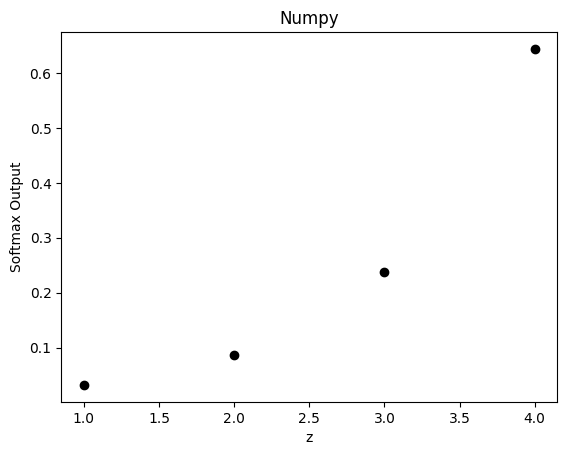

In [ ]:
plt.plot(z, sigma, 'ko')
plt.xlabel("z")
plt.ylabel("Softmax Output")
plt.title('Numpy')
#plt.yscale('log')
plt.show()

# Using PyTorch

In [ ]:
softfun = nn.Softmax(dim=0)
sigmaT = softfun(torch.Tensor(z))

print(sigmaT)

tensor([0.0321, 0.0871, 0.2369, 0.6439])


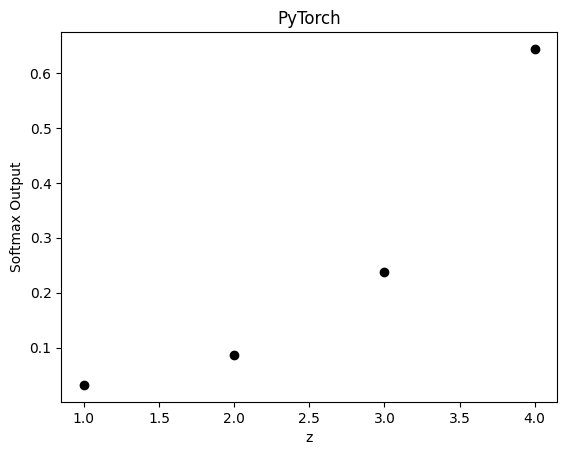

In [ ]:
plt.plot(z, sigma, 'ko')
plt.xlabel("z")
plt.ylabel("Softmax Output")
plt.title('PyTorch')
#plt.yscale('log')
plt.show()

## **Logarithm**

# Using Numpy

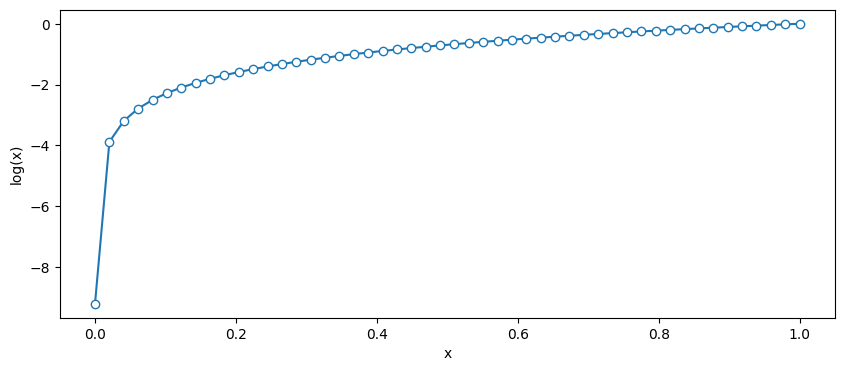

In [ ]:
x = np.linspace(.0001, 1, 50)
logx = np.log(x)

fig = plt.figure(figsize=(10, 4))
plt.plot(x, logx, 'o-', markerfacecolor='white')
plt.xlabel("x")
plt.ylabel("log(x)")
plt.show()

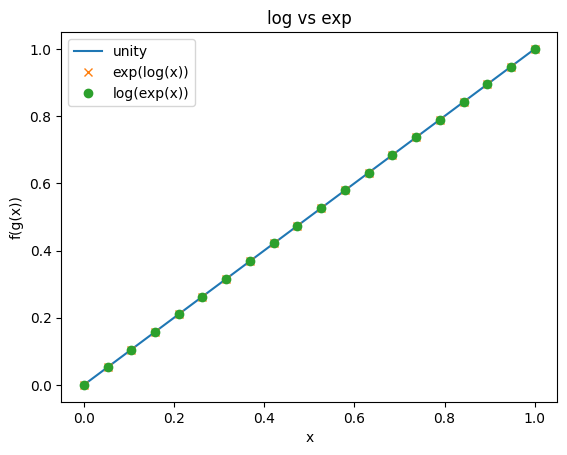

In [ ]:
x = np.linspace(.0001, 1, 20)
logx = np.log(x)
expx = np.exp(x)

plt.plot(x, x)
plt.plot(x, np.exp(logx), 'x')
plt.plot(x, np.log(expx), 'o')
plt.xlabel("x")
plt.ylabel("f(g(x))")
plt.title('log vs exp')
plt.legend(['unity', 'exp(log(x))', 'log(exp(x))'])
plt.show()

# **Entropy**
H = - (p* np.log(p) + (1-p)* np.log(1-p))

In [ ]:
p = .25

H = - (p* np.log(p) + (1-p)* np.log(1-p))

print("Entropy: ", H)

Entropy:  0.5623351446188083


# Cross Entropy

In [ ]:
p = [1, 0]
q = [.25, .75]

H = - (p[0]* np.log(q[0]) + p[1]* np.log(q[1]))
#H = - np.log(q[0])

print("Cross Entropy:", H)

Cross Entropy: 1.3862943611198906


# Using PyTorch

In [ ]:
import torch.nn.functional as F

#p->actual
#q->predicted

print("Wrong Order: ", F.binary_cross_entropy(torch.Tensor(p), torch.Tensor(q)))
print("Correct Order: ", F.binary_cross_entropy(torch.Tensor(q), torch.Tensor(p)))

Wrong Order:  tensor(75.)
Correct Order:  tensor(1.3863)


## **Min, Max, Argmin, Argmax**

In [ ]:
M = np.array([[0, 2, 7],
              [8, 11, 4]])

print('Matrix:\n', M)

print('\nMin Value: ', np.min(M))
print('Arg: ', np.argmin(M))

print('\nRow wise: ', np.min(M, axis=0))
print('Arg: ', np.argmin(M, axis=0))

print('\nColumn wise: ', np.min(M, axis=1))
print('Arg: ', np.argmin(M, axis=1))

Matrix:
 [[ 0  2  7]
 [ 8 11  4]]

Min Value:  0
Arg:  0

Row wise:  [0 2 4]
Arg:  [0 0 1]

Column wise:  [0 4]
Arg:  [0 2]


In [ ]:
M = torch.tensor([[0, 2, 7], [8, 11, 4]])

print('Matrix:\n', M)

print('\nMax Value: ', torch.max(M))
print('Arg: ', torch.argmax(M))

print('\nRow wise: ', torch.max(M, axis=0).values)
print('Arg: ', torch.max(M, axis=0).indices)

print('\nColumn wise: ', torch.max(M, axis=1).values)
print('Arg: ', torch.max(M, axis=1).indices)

Matrix:
 tensor([[ 0,  2,  7],
        [ 8, 11,  4]])

Max Value:  tensor(11)
Arg:  tensor(4)

Row wise:  tensor([ 8, 11,  7])
Arg:  tensor([1, 1, 0])

Column wise:  tensor([ 7, 11])
Arg:  tensor([2, 1])


# **Replacing missing data using Mean Value**

In [1]:
import torch

# Create a tensor with missing values (represented by NaN)
data = torch.tensor([[1, 2, torch.nan], [4, torch.nan, 6], [torch.nan, 8, 9]])
print(data)

# Mask for missing values
mask = torch.isnan(data)

# Calculate mean of valid values along each column
mean_values = data[~mask].mean(dim=0)
print(mean_values)

# Replace missing values with mean values
data[mask] = mean_values

print("Original data:")
print(data)

tensor([[1., 2., nan],
        [4., nan, 6.],
        [nan, 8., 9.]])
tensor(5.)
Original data:
tensor([[1., 2., 5.],
        [4., 5., 6.],
        [5., 8., 9.]])
